In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from nltk.sentiment.vader import SentimentIntensityAnalyzer # Added import for SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df=pd.read_csv("/content/YoutubeCommentsDataSet.csv")
print(df.head())
print(df['Sentiment'].value_counts())

                                             Comment Sentiment
0  lets not forget that apple pay in 2014 require...   neutral
1  here in nz 50 of retailers don’t even have con...  negative
2  i will forever acknowledge this channel with t...  positive
3  whenever i go to a place that doesn’t take app...  negative
4  apple pay is so convenient secure and easy to ...  positive
Sentiment
positive    11432
neutral      4638
negative     2338
Name: count, dtype: int64


In [ ]:
from nltk.stem import PorterStemmer
stemmer=PorterStemmer()

In [ ]:
def clean_text(text):
  text=text.lower()
  text=re.sub(r'\[.*?\]','',text)
  text=re.sub(r'\d+','',text)
  text=re.sub(r'[^\w\s]','',text)
  text=re.sub(r'\n','',text)
  text=re.sub(r'http?://\s+www\.\s+','',text)
  text=re.sub(r'<.*?>+','',text)
  # Split text into words and remove stop words
  words = [word for word in text.split() if word not in stop_words]
  # Stem the words and join them back into a string
  text = ' '.join([stemmer.stem(word) for word in words]) # Join the stemmed words into a single string
  return text

df['cleaned_comment']=df['Comment'].astype(str).apply(clean_text)
sentiment=df['Sentiment'].value_counts()

In [ ]:
numbers=sentiment.index
quantity=sentiment.values
print(numbers)
print(quantity)

Index(['positive', 'neutral', 'negative'], dtype='object', name='Sentiment')
[11432  4638  2338]


In [ ]:
import plotly.express as px
figure=px.pie(df,values=quantity,names=numbers,hole=0.5)
figure.show()

In [ ]:
text=''.join([word for word in df['cleaned_comment']])

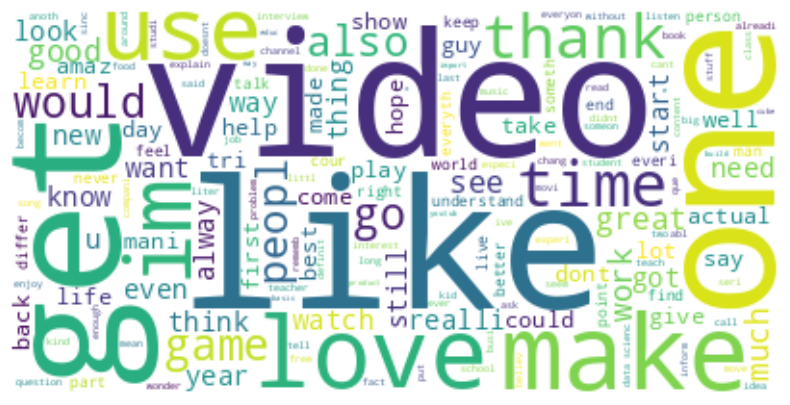

In [ ]:
from wordcloud import WordCloud
wordcloud=WordCloud(stopwords=stop_words,background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sentiments=SentimentIntensityAnalyzer()
df["positive"]=[sentiments.polarity_scores(i)["pos"]for i in df["cleaned_comment"]]
df["negative"]=[sentiments.polarity_scores(i)["neg"]for i in df["cleaned_comment"]]
df["neutral"]=[sentiments.polarity_scores(i)["neu"]for i in df["cleaned_comment"]]
df=df[["cleaned_comment","positive","negative","neutral"]]
print(df.head())

In [ ]:
x = sum(df["positive"])
y = sum(df["negative"])
z = sum(df["neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("positive 😊 ")
    elif (b>a) and (b>c):
        print("negative 😠 ")
    else:
        print("neutral 🙂 ")
sentiment_score(x, y, z)